In [ ]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf

import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228827136/228813984 [==============================] - 10s 0us/step


The dataset contains 5 types of flowers:

1. Rose
2. Daisy
3. Dandelion
4. Sunflowers
5. Tulips

In [ ]:
classes = ['Daisy', 'Dandelion', 'Rose' ,'Sunflower', 'Tulip']

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
BATCH_SIZE = 100
image_shape = 150

In [ ]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(image_shape,image_shape),
                                                     class_mode='binary')

Found 2935 images belonging to 5 classes.


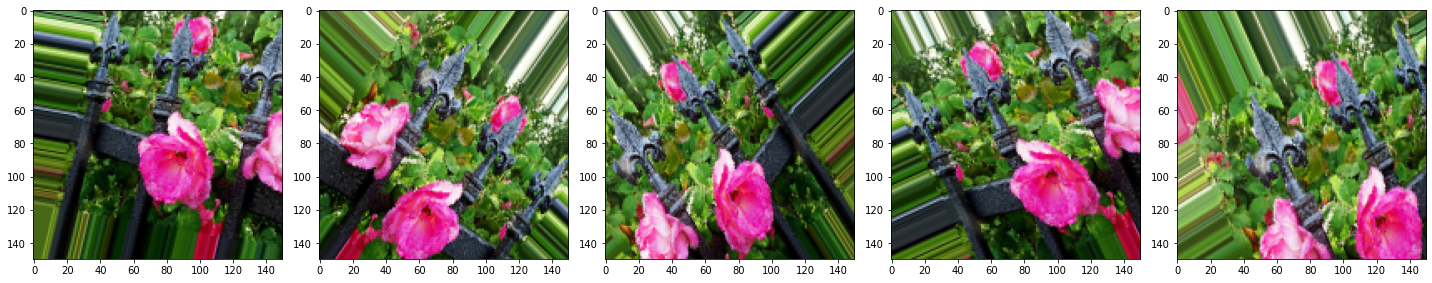

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=val_dir,
                                                 target_size=(image_shape, image_shape),
                                                 class_mode='binary')

Found 735 images belonging to 5 classes.


In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, input_shape=(150,150,3)),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),
                            
                             tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Conv2D(128, (3,3), activation=tf.nn.relu),
                             tf.keras.layers.MaxPooling2D(2,2),

                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation=tf.nn.relu),
                             tf.keras.layers.Dense(5,activation=tf.nn.softmax)
])

In [ ]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    epochs=epochs,
    steps_per_epoch=int(np.ceil(int(2935)/float(BATCH_SIZE))),
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(int(735)/float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/80
30/30 [==============================] - 38s 932ms/step - loss: 1.3785 - accuracy: 0.3877 - val_loss: 1.1931 - val_accuracy: 0.5129
Epoch 2/80
30/30 [==============================] - 27s 904ms/step - loss: 1.1526 - accuracy: 0.5097 - val_loss: 1.2039 - val_accuracy: 0.5020
Epoch 3/80
30/30 [==============================] - 27s 927ms/step - loss: 1.0724 - accuracy: 0.5564 - val_loss: 1.0012 - val_accuracy: 0.6068
Epoch 4/80
30/30 [==============================] - 27s 910ms/step - loss: 0.9877 - accuracy: 0.5966 - val_loss: 0.9464 - val_accuracy: 0.6435
Epoch 5/80
30/30 [==============================] - 27s 890ms/step - loss: 0.9285 - accuracy: 0.6198 - val_loss: 0.8788 - val_accuracy: 0.6667
Epoch 6/80
30/30 [==============================] - 26s 880ms/step - loss: 0.9065 - accuracy: 0.6327 - val_loss: 0.9291 - val_accuracy: 0.6517
Epoch 7/80
30/30 [==============================] - 27s 903ms/step - loss: 0.8711 - accuracy: 0.6566 - val_loss: 0.8103 - val_accuracy: 0.6980

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('rudrashah_flowers.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

model = load_model("rudrashah_flowers.h5")

In [ ]:
flowers = ['Daisy', 'Dandelion', 'Rose' ,'Sunflower', 'Tulip']

path = "test6.jpg"
test_image = image.load_img(path, target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result = result.flatten().tolist()
print(result)
lindx = np.argmax(result)
print(flowers[lindx])